In [10]:

import numpy
import pandas
from matplotlib import pyplot as plt


In [6]:

emb = pandas.read_parquet('embedding.parquet').set_index('time')
emb.shape


(7322, 1024)

In [19]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = emb
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)
pca = PCA()
X_pca = pca.fit_transform(X_std)
X_pca.shape

(7322, 1024)

(0.0, 128.0)

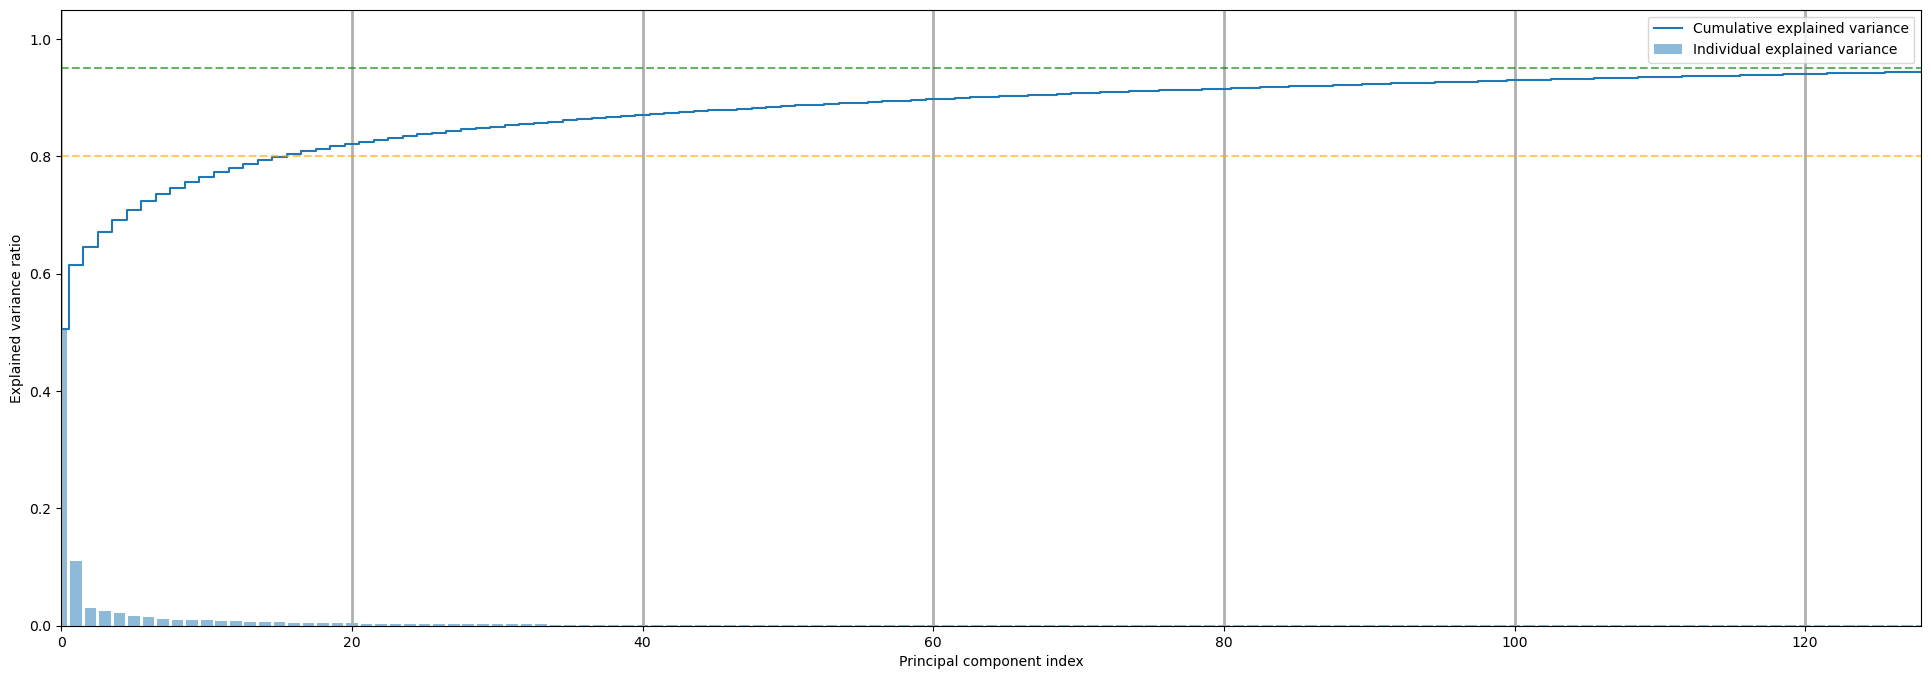

In [25]:
def plot_pca_variance(ax, pca):

    exp_var_pca = pca.explained_variance_ratio_

    cum_sum_eigenvalues = numpy.cumsum(exp_var_pca)
    
    ax.bar(range(0,len(exp_var_pca)), exp_var_pca,
           alpha=0.5,
           align='center',
           label='Individual explained variance')
    ax.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues,
            where='mid',
            label='Cumulative explained variance')
    ax.set_ylabel('Explained variance ratio')
    ax.set_xlabel('Principal component index')
    ax.legend(loc='best')
    ax.axhline(0.80, ls='--', alpha=0.6, color='orange')
    ax.axhline(0.95, ls='--', alpha=0.6, color='green')
    ax.grid(True, axis='x', lw=2.0) 

fig, ax = plt.subplots(1, figsize=(24,8))
plot_pca_variance(ax, pca)
ax.set_xlim(0, 128)

In [27]:
emb_pca = pandas.DataFrame(X_pca[:, 0:16], index=emb.index)
emb_pca.shape

(7322, 16)

In [49]:

# Try to segment using the embeddings
# TODO: perform clustering. AgglomerativeClustering


#cluster = sklearn.cluster.AgglomerativeClustering()

for eps in numpy.linspace(4.0, 5.0, 10):

    from sklearn.cluster import DBSCAN
    cluster = DBSCAN(eps=eps, min_samples=5)
    
    cluster.fit(emb_pca)
    emb_cluster = pandas.Series(cluster.labels_, index=emb_pca.index)
    print(eps, '\n', emb_cluster.value_counts())

# TODO: plot number of clusters and noise with changing hyperparameters

4.0 
 -1     7135
 1      100
 8       14
 0        9
 11       8
 4        7
 5        6
 12       6
 2        5
 7        5
 13       5
 3        5
 6        5
 10       5
 9        4
 14       3
dtype: int64
4.111111111111111 
 -1     7018
 2      149
 5       24
 8       11
 9       11
 1       10
 0        9
 14       9
 7        7
 6        7
 10       7
 18       6
 19       5
 12       5
 17       5
 11       5
 20       5
 3        5
 21       4
 4        4
 22       4
 15       4
 13       4
 16       4
dtype: int64
4.222222222222222 
 -1     6868
 1      273
 6       16
 8       15
 12      15
 0        9
 16       9
 17       8
 15       8
 10       7
 18       7
 11       7
 22       7
 23       6
 24       5
 25       5
 19       5
 4        5
 7        5
 2        5
 9        5
 13       5
 20       5
 14       4
 3        4
 27       4
 5        4
 21       3
 26       3
dtype: int64
4.333333333333333 
 -1     6693
 1      467
 5       26
 4       24
 0        9
 12    

In [71]:

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4)
    
cluster.fit(emb_pca)
agg_cluster = pandas.Series(cluster.labels_, index=emb_pca.index)
print(agg_cluster.value_counts())


2    5113
1    2058
0      89
3      62
dtype: int64


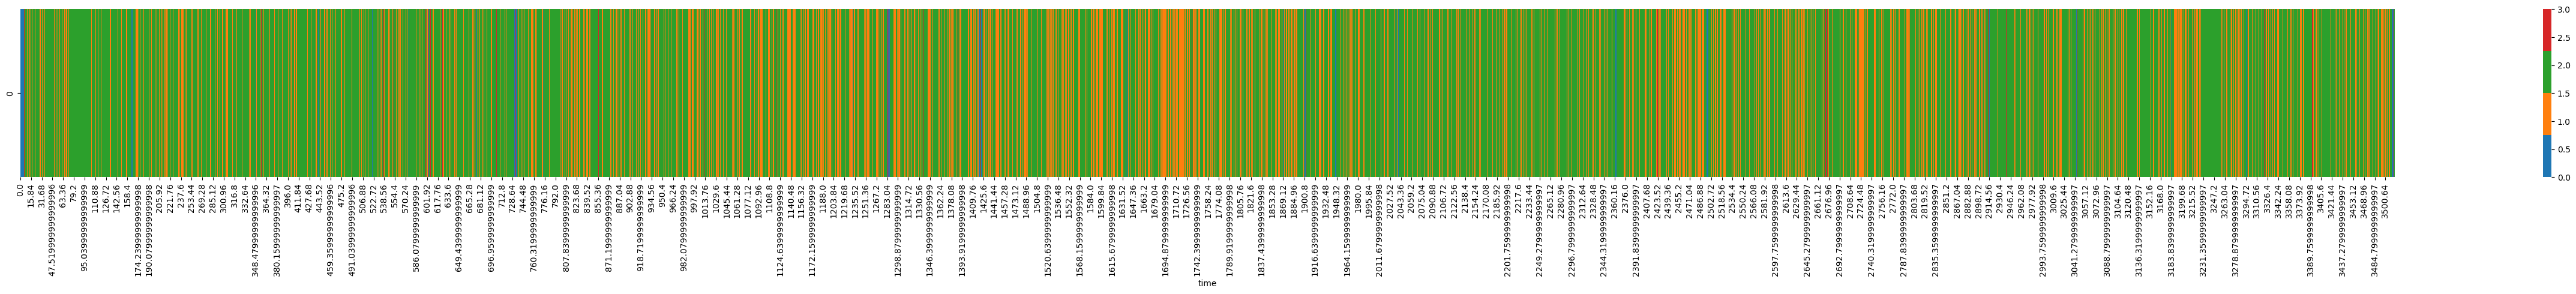

In [73]:
import seaborn

fig, ax = plt.subplots(1, figsize=(50, 5))

palette = 'tab10'
colors = seaborn.color_palette(palette)[0:agg_cluster.nunique()]

seaborn.heatmap(agg_cluster.to_frame().T, ax=ax, cmap=colors)
fig.tight_layout()